In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt

/Users/lufy/Developer/projects/digit-recognizer/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

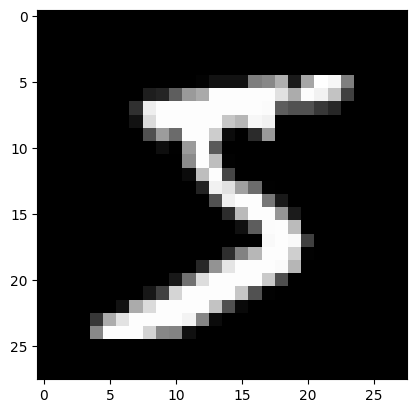

In [ ]:
# Training image
plt.imshow(x_train[0], cmap="gray")

In [4]:
# Pixel value harulai [0, 1] ko range ma lyaune (normalization)
x_train = x_train / 255
x_test = x_test / 255

In [5]:
# Create keras sequential model
model = keras.Sequential()

# First layer of the neural network, this is where the image data goes.
# The image is 28*28 pixels, so we need to flatten the image into 784 values
# 784 nodes hune vayo yo layer ma
model.add(keras.layers.Flatten(input_shape=(28,28)))

# Second layer of the neural network, this layer is hidden and contains 128 nodes
model.add(keras.layers.Dense(128, activation="relu"))

# Last layer containing 10 nodes. 10 ota number 0, 1, 2, .. 9 vako le
# 10 ota final nodes
# classification ko lagi "softmax" use garne
model.add(keras.layers.Dense(10, activation="softmax"))

/Users/lufy/Developer/projects/digit-recognizer/venv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Model lai compile hanne, ani train garna milxa
model.compile(loss=keras.losses.SparseCategoricalCrossentropy, optimizer="Adam", metrics=["accuracy"])

In [8]:
# Model lai train garne, epochs = num of times to train
# validation split = 0.2 vaneko purai data ma 20% chai 
# validation garna ko lagi chuttyayeko
history = model.fit(x_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8647 - loss: 0.4812 - val_accuracy: 0.9542 - val_loss: 0.1628
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9610 - loss: 0.1319 - val_accuracy: 0.9650 - val_loss: 0.1163
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9737 - loss: 0.0896 - val_accuracy: 0.9704 - val_loss: 0.0989
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9817 - loss: 0.0636 - val_accuracy: 0.9722 - val_loss: 0.0974
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9850 - loss: 0.0495 - val_accuracy: 0.9744 - val_loss: 0.0904
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9894 - loss: 0.0388 - val_accuracy: 0.9750 - val_loss: 0.0894
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9919 - loss: 0.0286 - val_accuracy: 0.9751 - val_loss: 0.0863
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9929 - loss: 0.0239 - 

In [9]:
# Predict the test inputs
y_probabilities = model.predict(x_test)
y_predictions = y_probabilities.argmax(axis=1)
print("test y values:", y_test)
print("test y predictions:", y_predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
test y values: [7 2 1 ... 4 5 6]
test y predictions: [7 2 1 ... 4 5 6]


In [10]:
# Aba accuracy mesure garne model ko
# accuray improve garna layer badauna milyo, epoch value ajai dherai halna milyo
# tara overfitting huna sakxa
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predictions)

0.9748

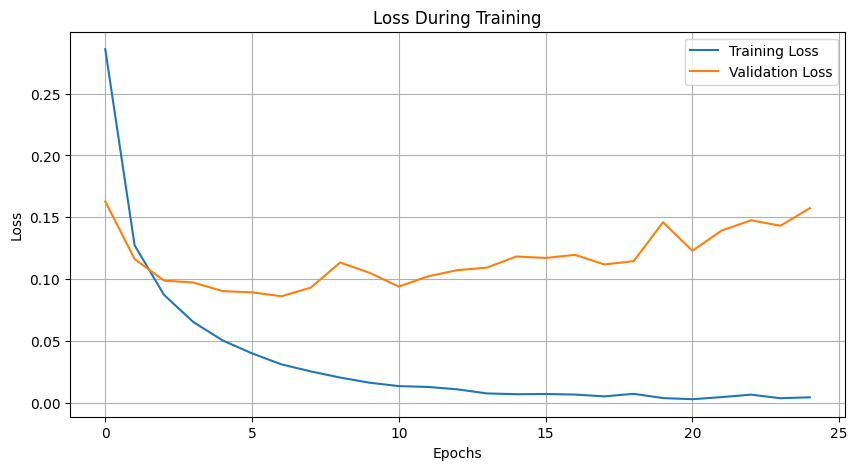

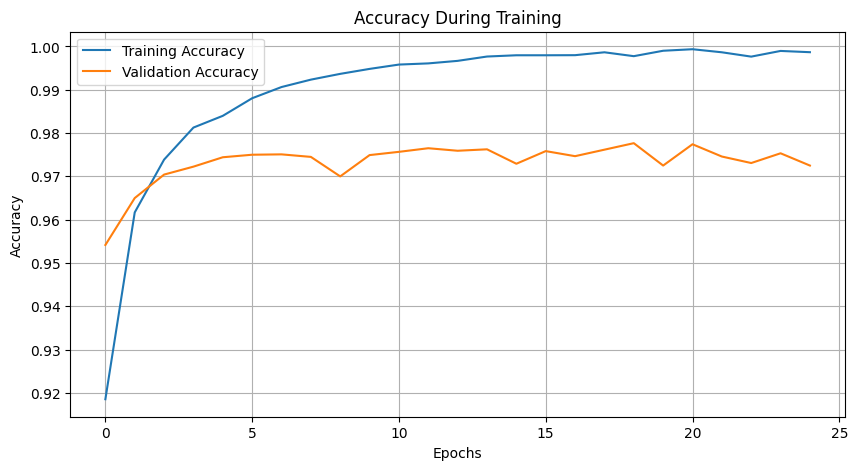

In [18]:
# Anaylze the training process

# Plot training and validation loss
plt.figure(figsize=(10, 5)) # figure wide banauxa
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss During Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy During Training")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


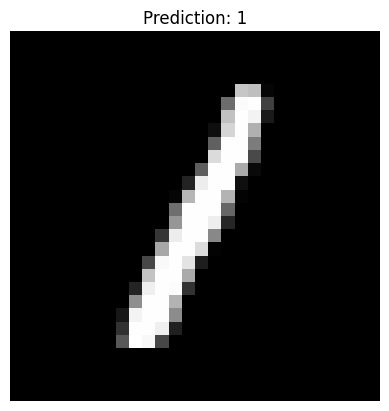

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


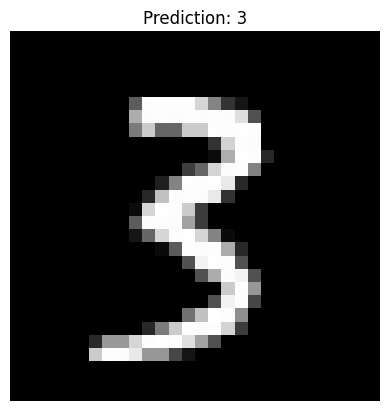

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


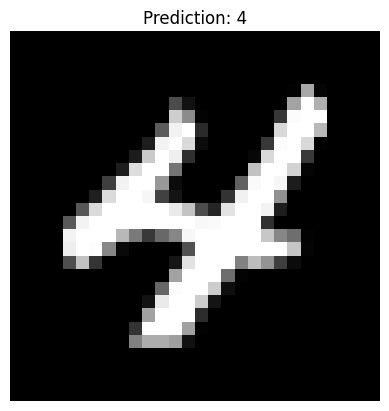

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


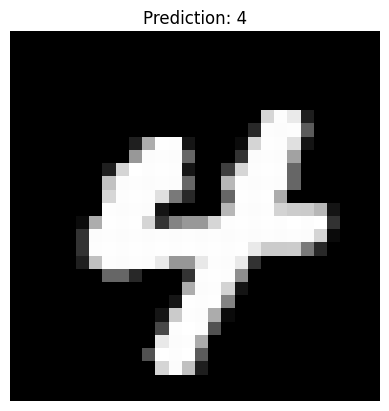

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


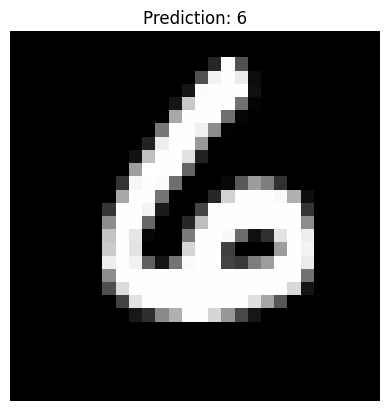

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


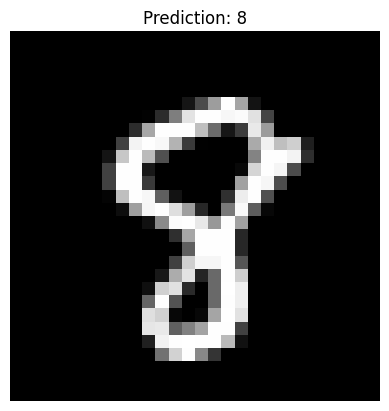

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


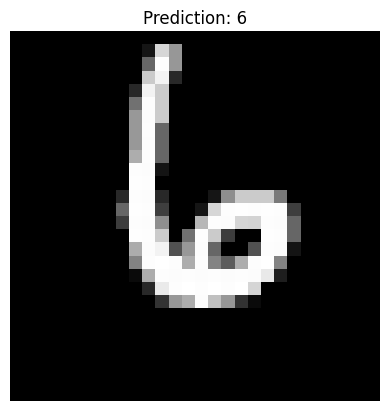

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


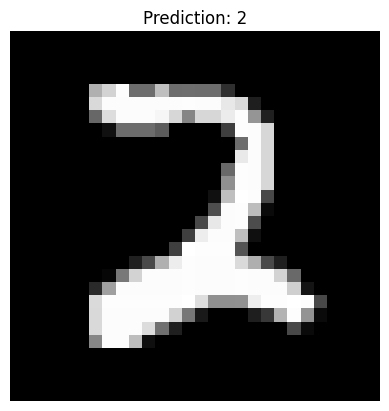

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


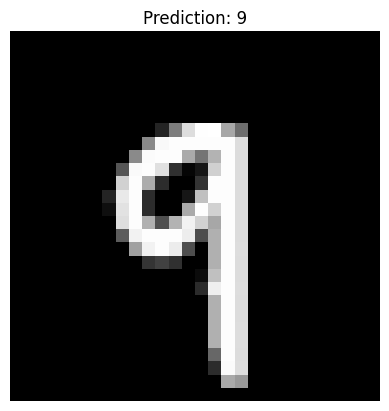

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


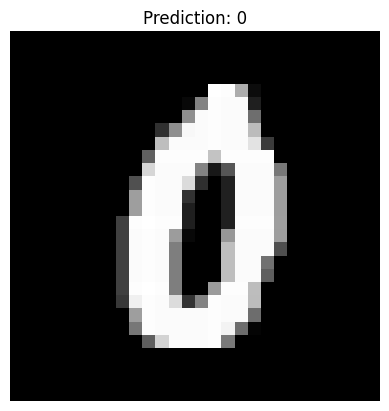

In [ ]:
# Test our model's output with 10 random test inputs
from random import randrange

for i in range(10):
    input_image = x_test[randrange(len(x_test))]
    plt.imshow(input_image, cmap="gray")
    probabilities = model.predict(input_image.reshape(1, 28, 28))
    prediction = probabilities.argmax(axis=1)[0] # one with highest probability
    plt.title(f"Prediction: {prediction}")
    plt.axis('off')
    plt.show() 
